##Load Data

After this executes, X and y will have all the extracted data and the labels with the given string labels in longNames and in longNamesYY that are latter used for plotting.

In [1]:
import numpy as np
import pickle

X = pickle.load(open('train.p'))
y = pickle.load(open('correct.p'))

longNames = ["Flick Left:1",
    "Flick Right:2",
    "Flick Up:3",
    "Flick Down:4",
    "Pan Left:5",
    "Pan Right:6",
    "Pan Up:7",
    "Pan Down:8",
    "Push:9",
    "Pull:10",
    "Double Tap:11",
    "Finger Wave Out:12",
    "Finger Wave In:13",
    "Whip:14",
    "Pluck:15",
    "Put:16",
    "Click:17",
    "Double Click:18",
    "Wobble:19",
    "Circle:20",
    "Erase:21"]

longNamesYY = ["FL:1",
    "FR:2",
    "FU:3",
    "FD:4",
    "PL:5",
    "PR:6",
    "PU:7",
    "PD:8",
    "Psh:9",
    "Pll:10",
    "DT:11",
    "FWO:12",
    "FWI:13",
    "Whp:14",
    "PCK:15",
    "Put:16",
    "Ck:17",
    "DCk:18",
    "Wob:19",
    "Cir:20",
    "Era:21"]

print(len(X))
print(len(X[0]))

1680
84


## Preprocess
After this, the data will be saved in `X_filtered` and has been median filtered. 

In [2]:
import scipy.signal as sp
from sklearn.preprocessing import StandardScaler

def get_maxima(row):
    lenfeat = 60
    backstart = 20
    idx = np.argmax(row[:lenfeat])
    strt = max([idx-backstart, 0])
    end = strt+lenfeat
    
    return (strt,end)

X_filtered = []
# use median filtering 
for i in range(X.shape[0]):
    mfiltsize = 5
    #strt,end = get_maxima(X[i,0:99])
    strt, end = 0, 99
    feat1 = sp.medfilt( X[i,strt:end], mfiltsize)
    feat2 = sp.medfilt( X[i,strt+100:end+100], mfiltsize)
    feat3 = X[i, 200:]
    newrow = np.concatenate((feat1,feat2,feat3))
    X_filtered.append(newrow)
    
    
# scl = StandardScaler()
# X_filtered = scl.fit_transform(X_filtered)
X_filtered = np.array(X_filtered)
    

In [3]:
#Map between users and their test ids
userMap = np.array([
    [36, 37, 43, 47, 52, 56, 60, 64, 91, 92],
    [38, 39, 42, 46, 51, 55, 59, 63, 67, 70],
    [40, 45, 49, 54, 58, 62, 66, 69, 73, 75],
    [41, 44, 48, 53, 57, 61, 65, 68, 71, 74],
    [72, 76, 77, 78, 79, 80, 81, 82, 83, 84],
    [85, 86, 87, 88, 89, 90, 94, 95, 96, 97],
    [93, 100, 102, 110, 111, 112, 113, 114, 115, 116],
    [98, 99, 101, 103, 104, 105, 106, 107, 108, 109] ])

testToUser = np.zeros(80)
for i in range(8):
    for j in range(10):
        if userMap[i][j] > 50:
            testToUser[userMap[i][j] - 37] = i
        else:
            testToUser[userMap[i][j] - 36] = i

print testToUser
testToUser = np.tile(testToUser, 21)
print len(testToUser)

[ 0.  0.  1.  1.  2.  3.  1.  0.  3.  2.  1.  0.  3.  2.  1.  0.  3.  2.
  1.  0.  3.  2.  1.  0.  3.  2.  1.  0.  3.  2.  1.  3.  2.  1.  3.  4.
  2.  3.  2.  4.  4.  4.  4.  4.  4.  4.  4.  4.  5.  5.  5.  5.  5.  5.
  0.  0.  6.  5.  5.  5.  5.  7.  7.  6.  7.  6.  7.  7.  7.  7.  7.  7.
  7.  6.  6.  6.  6.  6.  6.  6.]
1680


##Get reduced gesture set

In [4]:
# reduced gesture set
longNamesReduced = ["Left:1",
    "Right:2",
    "Up:3",
    "Down:4",
    "Push:5",
    "Pull:6",
    "Double:7",
    "Single:9",
#    "Finger:10",
#    "Double Click:11",
#    "Wobble:12",
#    "Circle:13",
    "Erase:14"]

longNamesYYReduced = ["LEF:1",
    "RIT:2",
    "UP:3",
    "DWN:4",
    "PSH:5",
    "PUL:6",
    "DTP:7",
    "WHP:9",
#    "FIN:10",
#    "DCL:11",
#    "WOB:12",
#    "CRC:13",
    "ERS:14"]

#remapping
#y = pickle.load(open('correct_80.p'))
y_reduced = np.copy(y)
y_reduced[y == 4] = 0.0 #l/r/u/d combined
y_reduced[y == 5] = 1.0
y_reduced[y == 6] = 2.0
y_reduced[y == 7] = 3.0
y_reduced[y == 8] = 4.0 #push
y_reduced[y == 9] = 5.0 #pull
y_reduced[y == 10] = 6.0 #dtap
y_reduced[y == 11] = 7.0 #wave out
y_reduced[y == 12] = 7.0 #wave in
y_reduced[y == 13] = 8.0 #whip
y_reduced[y == 14] = 5.0 #pluck
y_reduced[y == 15] = 4.0 #put
y_reduced[y == 16] = 8.0 #click
y_reduced[y == 17] = 6.0 #dclick
y_reduced[y == 18] = 7.0 #wobble
y_reduced[y == 19] = 7.0 #circle
y_reduced[y == 20] = 9.0 #erase

toRemove = y_reduced != 7
y_reduced = y_reduced[toRemove]
X_filtered_reduced = X_filtered[toRemove]
tTUC = testToUser[toRemove]

for i in np.unique(y_reduced):
    print 'Class', i, 'has num instances:', len(y_reduced[y_reduced == i])

Class 0.0 has num instances: 160
Class 1.0 has num instances: 160
Class 2.0 has num instances: 160
Class 3.0 has num instances: 160
Class 4.0 has num instances: 160
Class 5.0 has num instances: 160
Class 6.0 has num instances: 160
Class 8.0 has num instances: 160
Class 9.0 has num instances: 80


## Define distance function and test speed

In [5]:
from sklearn.metrics.pairwise import pairwise_distances

# manipulated from https://github.com/pierre-rouanet/dtw/blob/master/dtw.py 
# updated to use a scikit optimized c function for distances calculation
def dtw2(x, y, dist_metric='euclidean'):
    """ Computes the DTW of two sequences.
    :param array x: N1*M array
    :param array y: N2*M array
    :param func dist: distance used as cost measure (default L1 norm)
    Returns the minimum distance
    """
    x = np.array(x)
    if len(x.shape) == 1:
        x = x.reshape(-1, 1)
    y = np.array(y)
    if len(y.shape) == 1:
        y = y.reshape(-1, 1)

    r, c = len(x), len(y)

    D = np.zeros((r + 1, c + 1))
    D[0, 1:] = np.inf
    D[1:, 0] = np.inf

    D[1:,1:] = pairwise_distances(x,y,metric=dist_metric,n_jobs=1)
    
    for i in range(r):
        for j in range(c):
            D[i+1, j+1] += min(D[i, j], D[i, j+1], D[i+1, j])

    D = D[1:, 1:]

    dist = D[-1, -1] / sum(D.shape)

    return dist

def metric_distance(a, b, alpha=5, distin='euclidean'):
    # possible metrics are [‘cityblock’, ‘cosine’, ‘euclidean’, ‘l1’, ‘l2’, ‘manhattan’]
    if len(a) != 84:
        return np.inf
    
    low_dist = dtw2(a[0:40], b[0:40],dist_metric=distin)
    hi_dist = dtw2(a[40:80], b[40:80],dist_metric=distin)
    dir_dist = alpha * (abs(a[80] - b[80]) + abs(a[81] - b[81]) + abs(a[82] - b[82]) + abs(a[83] - b[83]))
    
    return low_dist + hi_dist + dir_dist




In [7]:
# #sequential method
# #now test using pairwise distance
# D = np.ones((len(X_filtered),len(X_filtered)))*-1.0
# for i in range(0, len(X_filtered),10):
#     for j in range(0, len(X_filtered),10):
#         if D[i,j] == -1.0:
#             d = metric_distance(X_filtered[i], X_filtered[j])
#             D[i,j] = d
#             D[j,i] = d

# parallelized method for running exhustive search through all parameters
%time D = pairwise_distances(X_filtered[0:50],metric=metric_distance, n_jobs=-1)


CPU times: user 30.6 ms, sys: 14.8 ms, total: 45.3 ms
Wall time: 6.02 s


In [8]:
print "estimated time to run all distances", len(X_filtered)**2/2 * 6.0/50.0**2 / 60 / 60, 'hours'

estimated time to run all distances 0.9408 hours


##Run cross validation
K fold cross validation here is really time intensive, so we will parallelize as best we can. Also, we will use the nearest centroid classifier as a way of reducing the brute force computations of KNN. It is slightly less expressive as KNN but can have a few centroids for each class.

In [22]:
# be sure you have the latest scikit-learn installation (at least 0.16.1)
from sklearn.cross_validation import StratifiedKFold
from sklearn.cross_validation import StratifiedShuffleSplit
from sklearn.cross_validation import cross_val_predict

# from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestCentroid

y_subset = y
X_subset = X

# clf = KNeighborsClassifier(n_neighbors=3, metric=metric_distance, algorithm='auto')
clf = NearestCentroid(metric=metric_distance) # overwriting the KNN

cv = StratifiedKFold(y_subset,n_folds=3)

# parallelized cross validation to get predictions
%time yhat = cross_val_predict(clf,X_subset,y=y_subset,cv=cv,n_jobs=-1)

CPU times: user 88.6 ms, sys: 39.9 ms, total: 128 ms
Wall time: 1min 29s


[Parallel(n_jobs=-1)]: Done   1 out of   3 | elapsed:  1.5min remaining:  3.0min
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.5min finished
/Library/Python/2.7/site-packages/sklearn/neighbors/nearest_centroid.py:136: UserWarning: Averaging for metrics other than euclidean and manhattan not supported. The average is set to be the mean.
  warnings.warn("Averaging for metrics other than "
/Library/Python/2.7/site-packages/sklearn/neighbors/nearest_centroid.py:136: UserWarning: Averaging for metrics other than euclidean and manhattan not supported. The average is set to be the mean.
  warnings.warn("Averaging for metrics other than "
/Library/Python/2.7/site-packages/sklearn/neighbors/nearest_centroid.py:136: UserWarning: Averaging for metrics other than euclidean and manhattan not supported. The average is set to be the mean.
  warnings.warn("Averaging for metrics other than "


0.252976190476


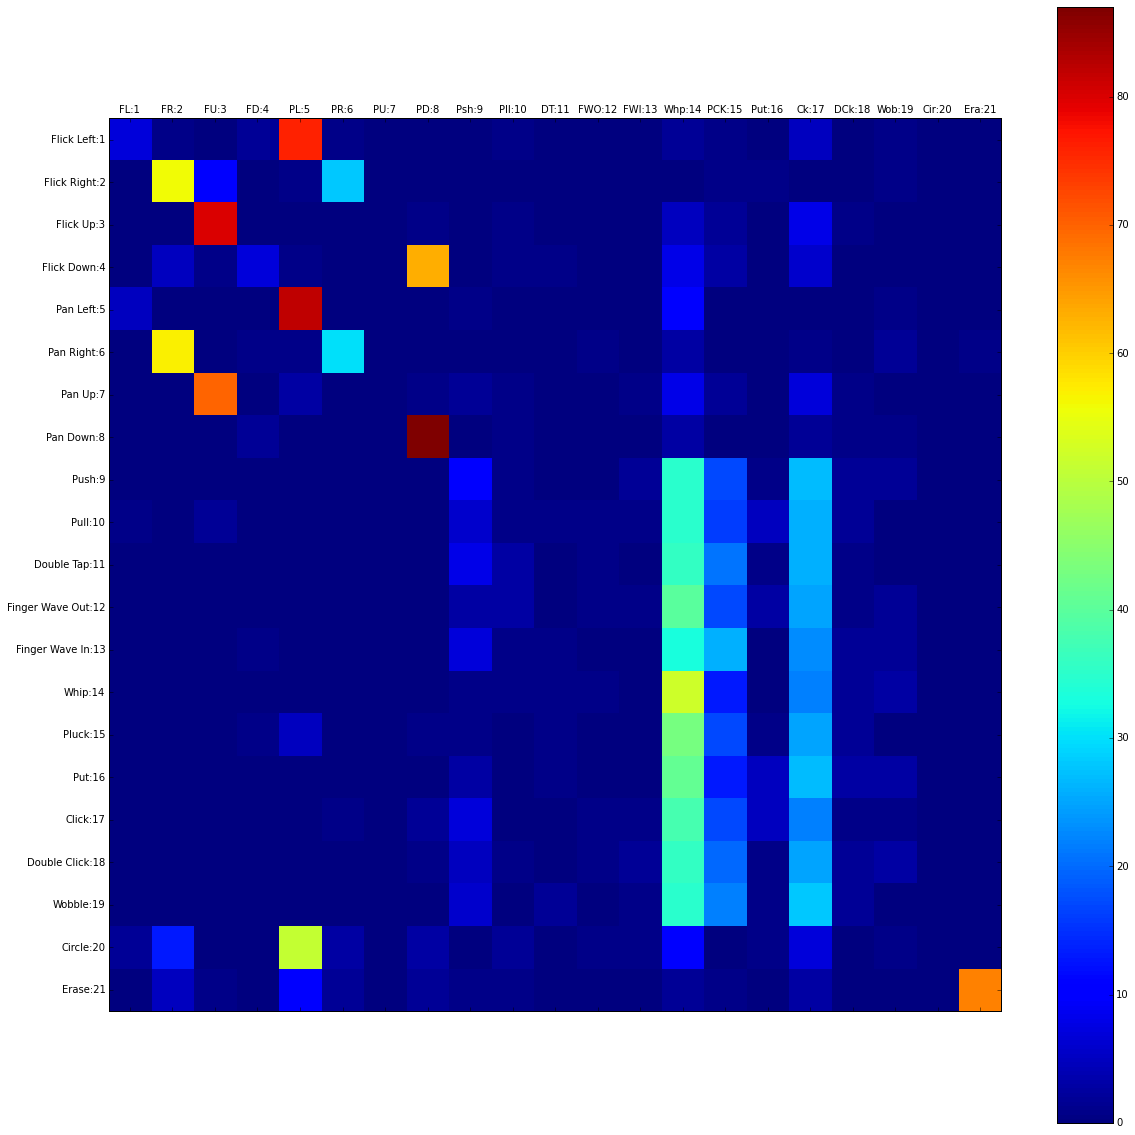

In [23]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from matplotlib import pyplot as plt

%matplotlib inline

conf = confusion_matrix(y_subset,yhat)
print accuracy_score(y_subset, yhat)

for i in range(len(conf)):
    s = np.sum(conf[i])
    for j in range(len(conf[i])):
        conf[i][j] = 100 * conf[i][j] / float(s)

fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111)
cax = ax.matshow(conf)
ax.set_xticks(range(len(longNamesYY)))
ax.set_yticks(range(len(longNames)))
ax.set_xticklabels(longNamesYY)
ax.set_yticklabels(longNames)
fig.colorbar(cax)
plt.show()

0.252976190476


/Library/Python/2.7/site-packages/IPython/kernel/__main__.py:8: RuntimeWarning: invalid value encountered in divide


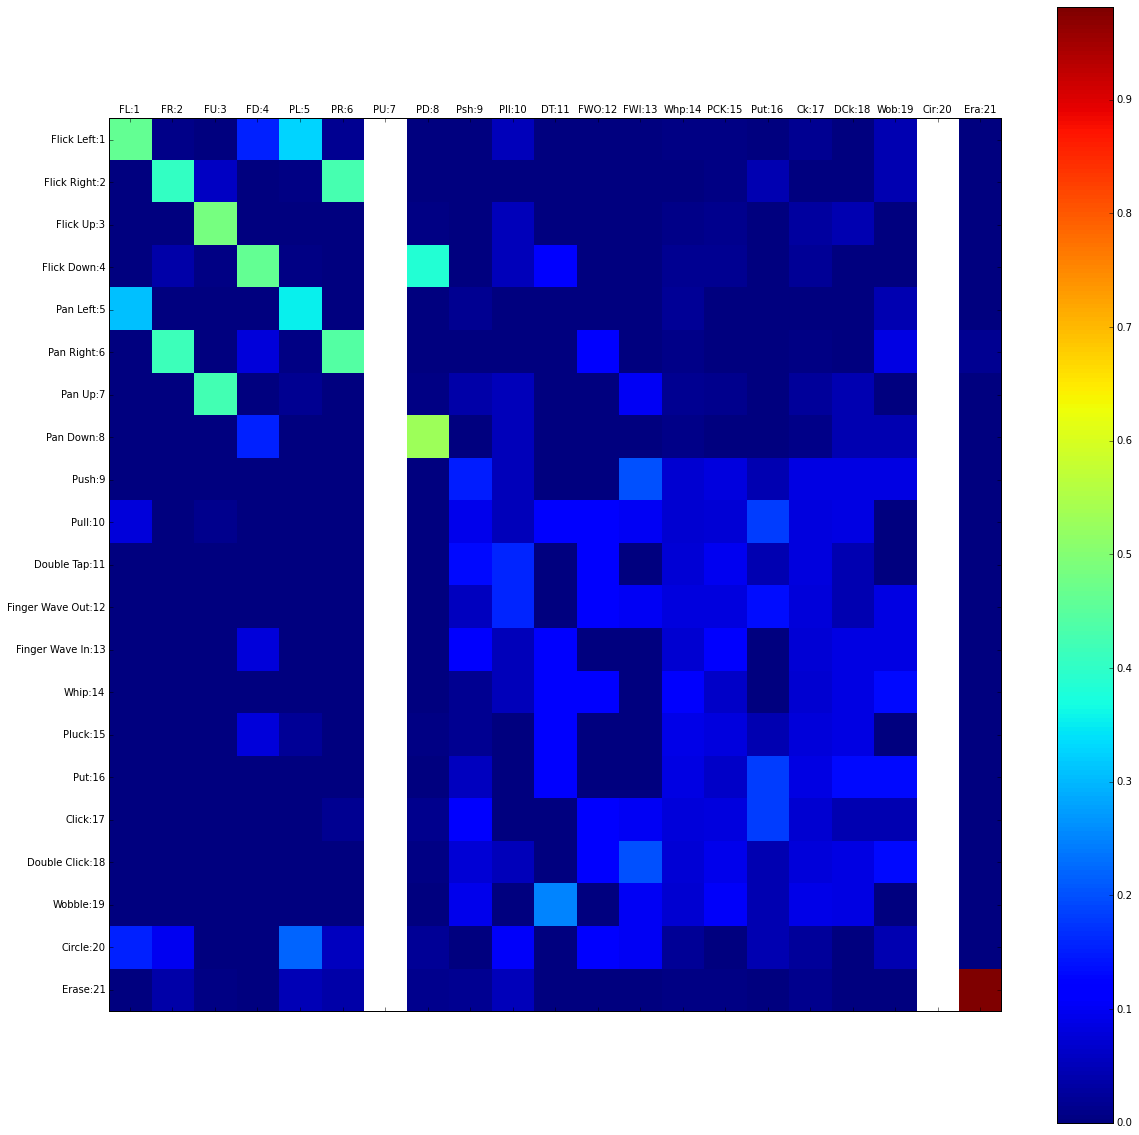

In [24]:
# confusion matrix normalized

conf = confusion_matrix(y_subset,yhat)
print accuracy_score(y_subset,yhat)

conf_normalized = conf.astype(np.float)
for i in range(conf.shape[0]):
    conf_normalized[:,i] = conf_normalized[:,i] / np.sum(conf[:,i] )

fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111)
cax = ax.matshow(conf_normalized)
ax.set_xticks(range(len(longNamesYY)))
ax.set_yticks(range(len(longNames)))
ax.set_xticklabels(longNamesYY)
ax.set_yticklabels(longNames)
fig.colorbar(cax)
plt.show()

#STOPPED EDITING HERE

In [ ]:
# across user 

from matplotlib import pyplot as plt
from sklearn.cross_validation import StratifiedKFold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA 
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier


%matplotlib inline

# pca_obj = PCA(n_components=50)

# clf_best = RandomForestClassifier(n_estimators=100, n_jobs = -1)
clf_best = KNeighborsClassifier(n_neighbors=7, algorithm='brute', metric='pyfunc', func=metric_distance)
# clf_best = SVC(kernel='linear',C=10.0, gamma=0.1, degree=3)
# clf_best = grdobj.best_estimator_

yhat = np.zeros(ycombined.shape)

user = np.arange(8) # 8 users
for u in user:
    print("Testing user %d" % (u))
    test = np.where(tTUC==u)
    train = np.where(tTUC!=u)
    clf_best.fit(Xcomb[train],ycombined[train])
    yhat[test] = clf_best.predict(Xcomb[test])
    
conf = confusion_matrix(ycombined,yhat)
print accuracy_score(ycombined,yhat)

for i in range(len(conf)):
    s = np.sum(conf[i])
    for j in range(len(conf[i])):
        conf[i][j] = 100 * conf[i][j] / float(s)

fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111)
cax = ax.matshow(conf)
ax.set_xticks(range(len(longNamesYYC)))
ax.set_yticks(range(len(longNamesC)))
ax.set_xticklabels(longNamesYYC)
ax.set_yticklabels(longNamesC)
fig.colorbar(cax)
plt.show()

In [ ]:
from matplotlib import pyplot as plt
from sklearn.cross_validation import StratifiedKFold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA 
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

%matplotlib inline

# per user calibration
clf_best = RandomForestClassifier(n_estimators=50, n_jobs = -1)
# clf_best = KNeighborsClassifier(n_neighbors=7)
# clf_best = SVC(kernel='linear',C=10.0, gamma=0.1, degree=3)
# clf_best = grdobj.best_estimator_

yhat = np.zeros(y.shape)

user = np.arange(8)
for u in user:
    user_indices = np.where(testToUser==u)
    Xuser = X[user_indices]
    yuser = y[user_indices]
    cv = StratifiedKFold(y[user_indices], n_folds=10)
    yhat_user = np.zeros(yuser.shape)
    for trainf, test in cv:
        clf_best.fit(Xuser[trainf],yuser[trainf])
        yhat_user[test] = clf_best.predict(Xuser[test])
    yhat[user_indices] = yhat_user
    
    
conf = confusion_matrix(y,yhat)
print accuracy_score(y,yhat)

for i in range(len(conf)):
    s = np.sum(conf[i])
    for j in range(len(conf[i])):
        conf[i][j] = 100 * conf[i][j] / float(s)

fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111)
cax = ax.matshow(conf)
ax.set_xticks(range(len(longNamesYY)))
ax.set_yticks(range(len(longNames)))
ax.set_xticklabels(longNamesYY)
ax.set_yticklabels(longNames)
fig.colorbar(cax)
plt.show()

In [ ]:
#Define the DTW Function
import sys
from dtw import dtw

def dtw_distance(ts_a, ts_b, max_warping_window = 10000, d = lambda x,y: abs(x-y)):
    """Returns the DTW similarity distance between two 2-D
    timeseries numpy arrays.

    Arguments
    ---------
    ts_a, ts_b : array of shape [n_samples, n_timepoints]
        Two arrays containing n_samples of timeseries data
        whose DTW distance between each sample of A and B
        will be compared

    d : DistanceMetric object (default = abs(x-y))
        the distance measure used for A_i - B_j in the
        DTW dynamic programming function

    Returns
    -------
    DTW distance between A and B
    """

    # Create cost matrix via broadcasting with large int
    ts_a, ts_b = np.array(ts_a), np.array(ts_b)
    M, N = len(ts_a), len(ts_b)
    cost = sys.maxint * np.ones((M, N))

    # Initialize the first row and column
    cost[0, 0] = d(ts_a[0], ts_b[0])
    for i in xrange(1, M):
        cost[i, 0] = cost[i-1, 0] + d(ts_a[i], ts_b[0])

    for j in xrange(1, N):
        cost[0, j] = cost[0, j-1] + d(ts_a[0], ts_b[j])

    # Populate rest of cost matrix within window
    for i in xrange(1, M):
        for j in xrange(max(1, i - max_warping_window),
                        min(N, i + max_warping_window)):
            choices = cost[i - 1, j - 1], cost[i, j-1], cost[i-1, j]
            cost[i, j] = min(choices) + d(ts_a[i], ts_b[j])

    # Return DTW distance given window 
    return cost[-1, -1]

def metric_distance(a, b):
    
    if len(a) != 84:
        return 0
    
    low_dist, cost, path = dtw(a[0:40], b[0:40])
    hi_dist, cost, path = dtw(a[40:80], b[40:80])
    dir_dist = 5 * (abs(a[80] - b[80]) + abs(a[81] - b[81]) + abs(a[82] - b[82]) + abs(a[83] - b[83]))
    
    return low_dist + hi_dist + dir_dist

#testnum = 800
#for i in range(0, len(Xcomb), 20):
#    print("dist(%d (%d), %d (%d)) = %.2f" % (testnum, ycombined[testnum], i, ycombined[i], metric_distance(Xcomb[testnum], Xcomb[i])))

# counts = np.zeros((10, 10))
# totals = np.zeros((10, 10))
# testnum = 0

# for i in range(0, len(Xcomb)):
    
#     #if i % 30 == 0:
#     print("%d/%d" % (i, len(Xcomb)))
        
#     for j in range(i + 1, len(Xcomb)):
#         counts[ycombined[i]][ycombined[j]] += 1
#         counts[ycombined[j]][ycombined[i]] += 1
#         dist = metric_distance(Xcomb[i], Xcomb[j])
#         totals[ycombined[i]][ycombined[j]] += dist
#         totals[ycombined[j]][ycombined[i]] += dist

# print("This is type %d" % (ycombined[testnum]))
# for i in range(0, 10):
#     if i == 7:
#         continue
#     print("Type %d = %.2f" % (i, totals[i] / counts[i]))

# print(totals / counts)

In [ ]:
print_mat = totals / counts
#for x in range(0,10):
#    print_mat[x] = print_mat[x] / np.nanmax(print_mat[x])

print("\t0\t1\t2\t3\t4\t5\t6\t7\t8\t9")
for x in range(0,10):
    print("%d:\t" % (x)),
    
    for y in range(0, 10):
        print("%.2f\t" % (print_mat[x][y])),
        
    print("(min = %.2f)" % (np.nanmin(print_mat[x])))
    
fig = plt.figure()

ax = fig.add_subplot(111)
ax.set_title('colorMap')
plt.imshow(print_mat, cmap='BrBG')
ax.set_aspect('equal')

cax = fig.add_axes([0.12, 0.1, 0.78, 0.8])
cax.get_xaxis().set_visible(False)
cax.get_yaxis().set_visible(False)
cax.patch.set_alpha(0)
cax.set_frame_on(False)
plt.colorbar(orientation='vertical')
plt.show()